---
title: Earth Day Event 2023
subtitle: Data Science for Climate Change
date: April, 28, 2023
---

# Hackathon Instructions

## The NetCDF file format

In this hackathon you are going to familiarize yourself with the NetCDF file format and use it to generate temperature predictions. 

NetCDF (Network Common Data Form) is designed to facilitate access to array-oriented scientific data. NetCDF is a portable, *self-describing* format. This means that there is a header which describes the layout of the rest of the file, in particular the data arrays, as well as arbitrary file metadata in the form of name/value attributes. NetCDF is used extensively in the atmospheric and oceanographic communities to store variables, such as temperature, pressure, wind speed, and wave height. It is also used widely in climate modeling and analysis.

For this hackathon, you will be working on a subsample from the GISS Surface Temperature Analysis version 4 (GISTEMP v4). GISTEMP provides a measure of the changing global surface temperature with monthly resolution since 1880. It takes historical temperature data from land-based weather stations as input and combines these data to produce an estimate of temperature change over large regions.



Due to its compressing, in all programming languages opening NetCDF requires installing a package and a specific list of commands.

* In R, you can try **ncdf4**: [https://cran.r-project.org/web/packages/ncdf4/index.html](https://cran.r-project.org/web/packages/ncdf4/index.html)
* In Python, one option is **netCDF4**: [https://pypi.org/project/netCDF4/](https://pypi.org/project/netCDF4/)
* Julia has **NetCDF.jl** for the task: [https://www.juliapackages.com/p/netcdf](https://www.juliapackages.com/p/netcdf)

Here is an example of how to open one in Julia using the **NetCDF.jl** package. We also load the **Plots** package to create some figures.

In [2]:
using NetCDF, Plots

We use the *ncinfo()* function to obtain information on the file.

In [3]:
ncinfo("temp_anomaly_ex1.nc")


##### NetCDF File #####

/home/eduardo/OneDrive/Research/EarthDay/2023/Hackathon/temp_anomaly_ex1.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 10                        
time                                                1420                      
lon                                                 10                        

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             FLOAT           lat                             
global                          DOUBLE                                          
tempanomaly                     DOUBLE          lat lon time                    
time                            INT64          

We note that the file contains several variables including one called *tempanomaly*, which as the name suggests contain temperature anomalies.

Any variable can be extracted from the file using the *ncread()* function

In [6]:
ncread("temp_anomaly_ex1.nc","time")

1420-element Vector{Int64}:
  300
  301
  302
  303
  304
  305
  306
  307
  308
  309
    ⋮
 1711
 1712
 1713
 1714
 1715
 1716
 1717
 1718
 1719

From the info above, we note that *tempanomaly* has three dimensions: latitude, longitude and time. Hence, we can recover a time series by fixing a latitude and longitude through time.

In [12]:
my_data = ncread("temp_anomaly_ex1.nc","tempanomaly")[1,1,1000:1420]

421-element Vector{Float64}:
  96.0
  47.0
 178.0
  95.0
  90.0
  76.0
 181.0
 202.0
 -47.0
 100.0
   ⋮
  -6.0
  86.0
  14.0
  26.0
 -69.0
  59.0
  72.0
  90.0
  42.0

We plot this data.

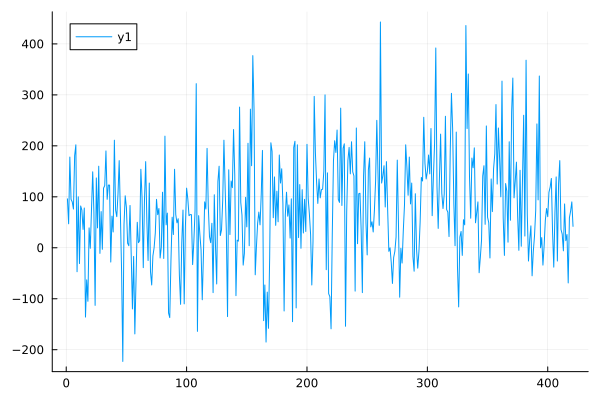

In [13]:
plot(my_data)

And we can make the simplest of time series predictions there is, repeating the last observation and attaching it to the original data.

In [18]:
my_prediction = my_data[end].*[1,1,1,1,1]
my_data_with_prediction = [my_data; my_prediction]

426-element Vector{Float64}:
  96.0
  47.0
 178.0
  95.0
  90.0
  76.0
 181.0
 202.0
 -47.0
 100.0
   ⋮
  59.0
  72.0
  90.0
  42.0
  42.0
  42.0
  42.0
  42.0
  42.0

We plot both.

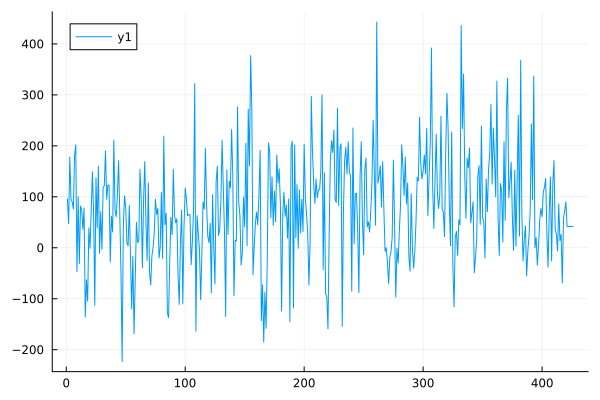

In [19]:
plot(my_data_with_prediction)

And just like that, we have created our first prediction for temperature anomalies.

More information on the NetCDF package can be obtained at the package's website.